# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [72]:
# put your answer here
# Check existing column names in your DataFrame
print(df.columns)

# Assuming there might be typos, correct the column names if needed
columns_to_drop = ['show_id', 'description', 'date_added', 'director', 'cast']
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df.drop(columns=existing_columns, inplace=True)
df.dropna(inplace=True)

Index(['type', 'title', 'country', 'release_year', 'rating', 'duration',
       'listed_in'],
      dtype='object')


In [73]:
import numpy as np

def process_duration(duration):
    # Check if duration is numeric
    if isinstance(duration, (int, float)):
        return duration  # If numeric, return as is
    elif isinstance(duration, str):
        if 'min' in duration:
            return int(duration.replace(' min', ''))
        elif 'Season' in duration or 'Seasons' in duration:  # Handle both 'Season' and 'Seasons'
            try:
                return int(duration.split()[0])  # Extract the number of seasons
            except ValueError:
                return np.nan  # Handle cases with invalid season values
    return np.nan

df['duration'] = df['duration'].apply(process_duration)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


final_data = df[['release_year', 'duration']].dropna()
# Now try applying PCA again:
pca = PCA()
pca_features = pca.fit_transform(final_data)

2. Create a scree plot for each principal component

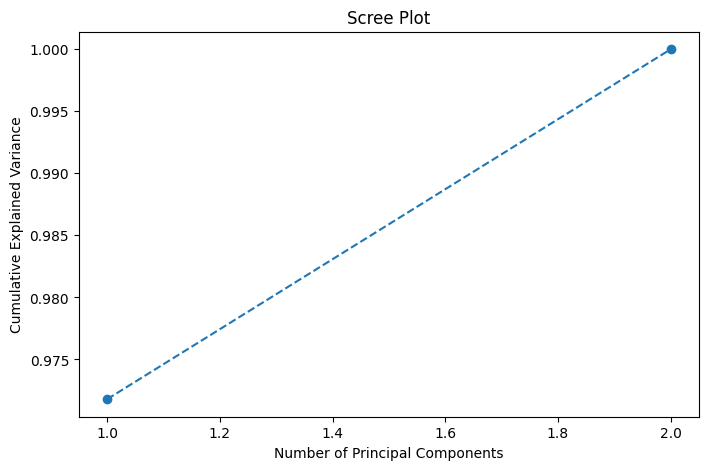

Optimal number of components: 1


In [74]:
# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(final_data)

# Create a Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Determine number of components (keep 95% variance)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Reduce dimensions using optimal PCA
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(final_data)


In [ ]:
# put your answer here

3. Use any clustering algorithm to create clusters

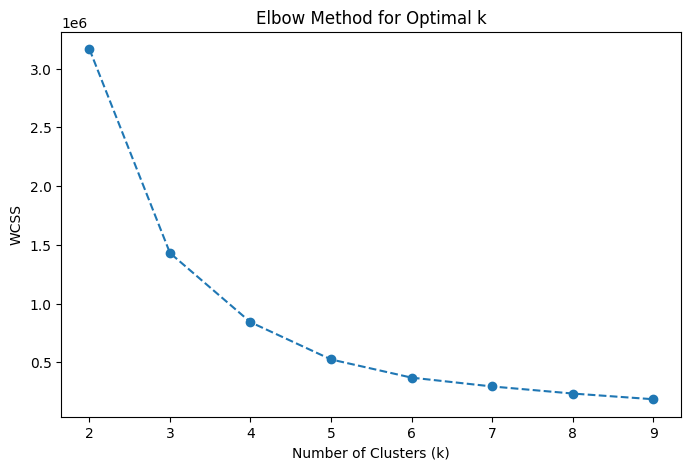

In [75]:
# put your answer here
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (based on elbow point)
optimal_k = 4  # Adjust if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(pca_features)

4. Profile each cluster that you have generated based on your experiments

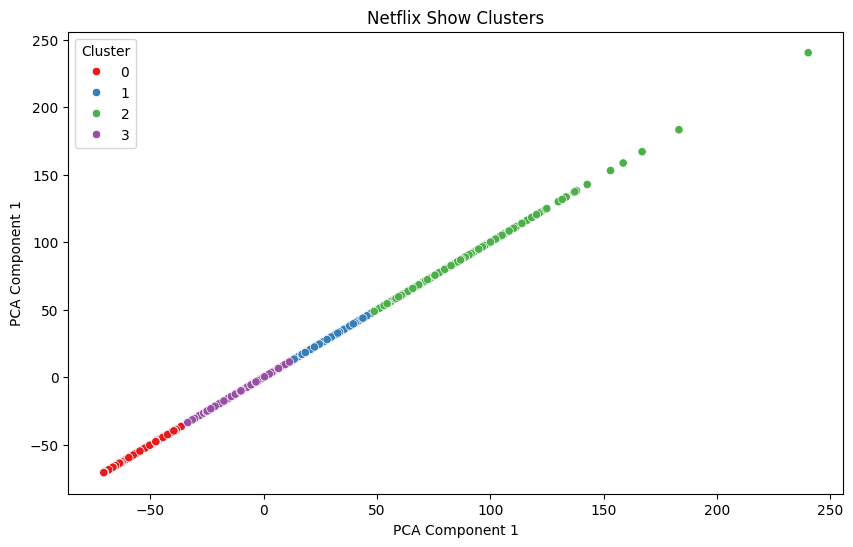

Cluster 0 Summary:
type               TV Show
rating               TV-MA
listed_in         Kids' TV
country      United States
Name: 0, dtype: object
--------------------------------------------------
Cluster 1 Summary:
type                                Movie
rating                              TV-MA
listed_in    Dramas, International Movies
country                     United States
Name: 0, dtype: object
--------------------------------------------------
Cluster 2 Summary:
type                                          Movie
rating                                        TV-14
listed_in    Comedies, Dramas, International Movies
country                                       India
Name: 0, dtype: object
--------------------------------------------------
Cluster 3 Summary:
type                   Movie
rating                 TV-MA
listed_in    Stand-Up Comedy
country        United States
Name: 0, dtype: object
--------------------------------------------------


In [77]:

!pip install seaborn
import seaborn as sns

# Assuming pca_features has only 1 component, use it for both x and y
# Alternatively, consider adjusting PCA to retain more components if needed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 0], hue=df['Cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 1')  # Changed to match x-axis
plt.title('Netflix Show Clusters')
plt.legend(title='Cluster')
plt.show()

# Analyze each cluster
for cluster in range(optimal_k):
    print(f"Cluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster][['type', 'rating', 'listed_in', 'country']].mode().iloc[0])
    print("-" * 50)